In [1]:
from pypdf import PdfReader

In [2]:
reader = PdfReader("Hourly_Readings_1903.pdf")

In [3]:
images_per_page = [ len(page.images) for page in reader.pages ]
all([ 1==imgs for imgs in images_per_page ])

True

In [ ]:
# display(reader.pages[15].images[0].image)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Assuming reader.pages[15].images[0].image is a PIL image
pil_image = reader.pages[15].images[0].image

In [ ]:
# Read the input image
input_image = np.array(pil_image)

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Create a Line Segment Detector
detector = cv2.createLineSegmentDetector(
    refine=cv2.LSD_REFINE_STD,  # Standard refinement
    scale=1,                  # Scale of the image
    sigma_scale=0.6,            # Sigma for Gaussian filter
    quant=2.0,                  # Quantization error
    ang_th=22.5,                # Gradient angle tolerance
    log_eps=0,                  # Logarithm of the detection threshold
    density_th=0.9,             # Increase density threshold to filter out shorter lines
    n_bins=1024                 # Number of bins in the quantization of the gradient orientation
)

In [ ]:
# Detect lines in the grayscale image
lines = detector.detect(gray_image)[0]

In [ ]:
# Draw the detected lines on the input image
detector.drawSegments(input_image, lines)

In [ ]:
# Convert BGR to RGB for displaying with matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

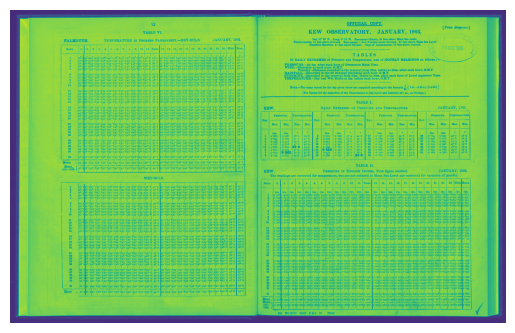

In [16]:
# Display the image with detected lines using matplotlib
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Hide axes
# plt.show()
plt.savefig("output.png")

In [12]:
# pil_image.save("output.png")

<Figure size 640x480 with 0 Axes>

In [8]:
lines

array([[[ 197.01698, 3625.7678 ,  216.94467, 3626.9683 ]],

       [[ 945.62494, 3621.8435 , 1410.625  , 3621.8267 ]],

       [[1991.8777 ,   92.75948, 1899.3708 ,   93.04477]],

       ...,

       [[2932.3853 , 1734.37   , 2932.6548 , 1761.8673 ]],

       [[2940.2651 , 2633.1208 , 2940.1067 , 2646.8833 ]],

       [[5723.383  , 1282.9095 , 5721.3994 , 1292.0431 ]]], dtype=float32)

In [9]:
lines.shape

(21131, 1, 4)